In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.inspection import partial_dependence, plot_partial_dependence
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
from sklearn.svm import SVC
import numpy as np

import textwrap # for wrapping answer descriptions
from individual_soln import * # use functions from individual_soln.py
from boosting import *

df = pd.read_csv('data/Train.zip', low_memory = False)
df = df.iloc[::20, :]


In [5]:
#['SalesID', 'SalePrice', 'MachineID', 'ModelID', 'datasource', 'auctioneerID', 'YearMade', 
# 'MachineHoursCurrentMeter', 'UsageBand', 'saledate', 'fiModelDesc', 'fiBaseModel', 'fiSecondaryDesc', 
# 'fiModelSeries', 'fiModelDescriptor', 'ProductSize', 'fiProductClassDesc', 
# 'state', 'ProductGroup', 'ProductGroupDesc', 'Drive_System', 'Enclosure', 'Forks', 'Pad_Type', 
# 'Ride_Control', 'Stick', 'Transmission', 'Turbocharged', 'Blade_Extension', 'Blade_Width', 'Enclosure_Type', 
# 'Engine_Horsepower', 'Hydraulics', 'Pushblock', 'Ripper', 'Scarifier', 'Tip_Control', 'Tire_Size', 'Coupler',
#  'Coupler_System', 'Grouser_Tracks', 'Hydraulics_Flow', 'Track_Type', 'Undercarriage_Pad_Width', 
# 'Stick_Length', 'Thumb', 'Pattern_Changer', 'Grouser_Type', 'Backhoe_Mounting', 'Blade_Type', 
# 'Travel_Controls', 'Differential_Type', 'Steering_Controls']
#print(df.columns.tolist())

X = df.loc[:,['Grouser_Type','ProductSize','Drive_System','Thumb','Track_Type','Pattern_Changer','Differential_Type','Steering_Controls']]
y = df.SalePrice.values



In [6]:
cols = list(X.columns)
for col in cols:
    if X.dtypes[col] == object:
        cat = pd.get_dummies(X[col],prefix=col)
        X = pd.concat([X,cat],axis=1)
        X.drop(col,inplace=True,axis=1)
result = X.values

In [14]:
# Check for which numeric columns have null values
for label, content in X.items():
    if pd.api.types.is_numeric_dtype(content):
        if pd.isnull(content).sum():
            print(label)

In [23]:
df[df.eq('null').any(1)]

,SalesID,SalePrice,MachineID,ModelID,datasource,auctioneerID,YearMade,MachineHoursCurrentMeter,UsageBand,saledate,...,Undercarriage_Pad_Width,Stick_Length,Thumb,Pattern_Changer,Grouser_Type,Backhoe_Mounting,Blade_Type,Travel_Controls,Differential_Type,Steering_Controls


In [11]:
X.isnull()

,Grouser_Type_Double,Grouser_Type_Single,Grouser_Type_Triple,ProductSize_Compact,ProductSize_Large,ProductSize_Large / Medium,ProductSize_Medium,ProductSize_Mini,ProductSize_Small,Drive_System_All Wheel Drive,...,Pattern_Changer_Yes,Differential_Type_Limited Slip,Differential_Type_Locking,Differential_Type_No Spin,Differential_Type_Standard,Steering_Controls_Command Control,Steering_Controls_Conventional,Steering_Controls_Four Wheel Standard,Steering_Controls_No,Steering_Controls_Wheel
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
20,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
40,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
60,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
80,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
401040,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
401060,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
401080,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
401100,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [7]:
X_train, X_test, y_train, y_test = train_test_split(result,np.log(y), random_state = 1)

In [28]:
#models
rf = RandomForestRegressor(n_estimators=100,
                           n_jobs=-1,
                           random_state=1)

gdbr = GradientBoostingRegressor(learning_rate=0.1,
                                 n_estimators=100, loss = 'ls',
                                 random_state=1)

dtr = DecisionTreeRegressor(random_state=1)


In [31]:
#cross_val() comes from individual_soln.py
cross_val(rf, X_train, y_train, 5) 
cross_val(gdbr, X_train, y_train, 5) 
cross_val(dtr, X_train, y_train, 5); 

RandomForestRegressor     Train CV | MSE: 0.303 | R2: 0.363
GradientBoostingRegressor Train CV | MSE: 0.306 | R2: 0.356
DecisionTreeRegressor     Train CV | MSE: 0.303 | R2: 0.362


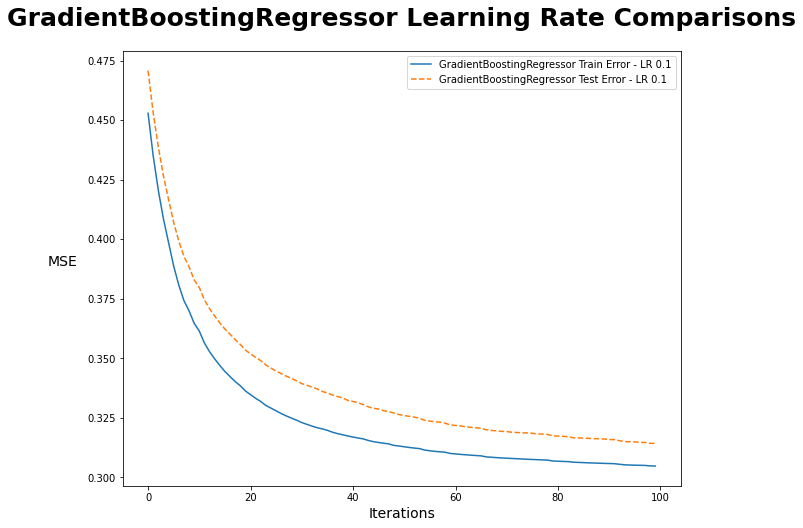

In [32]:
fig, ax = plt.subplots(figsize=(10,8))
plot_state_score(gdbr, ax, X_train, y_train, X_test, y_test)

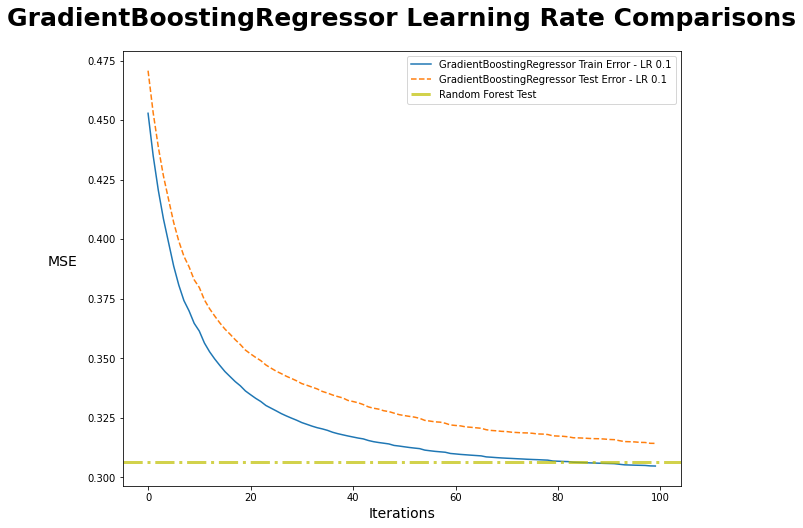

In [40]:
fig, ax = plt.subplots(figsize=(10,8))

plot_state_score(gdbr, ax, X_train, y_train, X_test, y_test)
rf_score_plot(rf, X_train, y_train, X_test, y_test)
plt.legend();

In [37]:
def gridsearch_with_output(estimator, parameter_grid, X_train, y_train):
    '''
        Parameters: estimator: the type of model (e.g. RandomForestRegressor())
                    paramter_grid: dictionary defining the gridsearch parameters
                    X_train: 2d numpy array
                    y_train: 1d numpy array

        Returns:  best parameters and model fit with those parameters
    '''
    model_gridsearch = GridSearchCV(estimator,
                                    parameter_grid,
                                    n_jobs=-1,
                                    verbose=True,
                                    scoring='neg_mean_squared_error')
    model_gridsearch.fit(X_train, y_train)
    best_params = model_gridsearch.best_params_ 
    model_best = model_gridsearch.best_estimator_
    print("\nResult of gridsearch:")
    print("{0:<20s} | {1:<8s} | {2}".format("Parameter", "Optimal", "Gridsearch values"))
    print("-" * 55)
    for param, vals in parameter_grid.items():
        print("{0:<20s} | {1:<8s} | {2}".format(str(param), 
                                                str(best_params[param]),
                                                str(vals)))
    return best_params, model_best


In [38]:
from sklearn.model_selection import GridSearchCV

gradient_boosting_grid = {'learning_rate': [0.1, 0.05, 0.01],
                          'max_depth': [2,3,4],
                          'max_features': [1.0, 0.3, 0.1],
                          'n_estimators': [50, 100]}

gdbr_best_params, gdbr_best_model = gridsearch_with_output(GradientBoostingRegressor(), 
                                                           gradient_boosting_grid, 
                                                           X_train, y_train)

print("\nComparing model with gridsearch params to initial model on Test set.")
gdbr.fit(X_train, y_train)
display_default_and_gsearch_model_results(gdbr, gdbr_best_model, X_test, y_test)

Fitting 5 folds for each of 54 candidates, totalling 270 fits

Result of gridsearch:
Parameter            | Optimal  | Gridsearch values
-------------------------------------------------------
learning_rate        | 0.1      | [0.1, 0.05, 0.01]
max_depth            | 4        | [2, 3, 4]
max_features         | 1.0      | [1.0, 0.3, 0.1]
n_estimators         | 100      | [50, 100]

Comparing model with gridsearch params to initial model on Test set.
Results for GradientBoosting
Gridsearched model mse: 0.309 | r2: 0.372
     Default model mse: 0.314 | r2: 0.361


In [39]:
gdbr_opt = GradientBoostingRegressor(learning_rate= 0.1,
                                    loss='ls',
                                    max_depth = 4, 
                                    max_features= 1.0,
                                    random_state=1,
                                    n_estimators=100,)

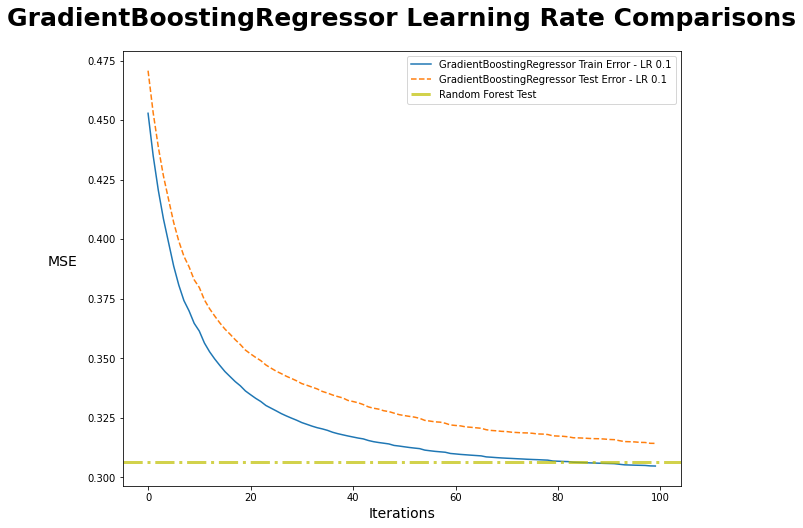

In [41]:
fig, ax = plt.subplots(figsize=(10,8))
plot_state_score(gdbr, ax, X_train, y_train, X_test, y_test)
rf_score_plot(rf, X_train, y_train, X_test, y_test)
plt.legend();

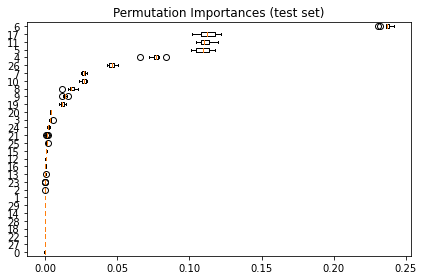

In [42]:
from sklearn.inspection import permutation_importance

result = permutation_importance(gdbr, X_test, y_test, n_repeats=10,
                                random_state=42, n_jobs=2)
sorted_idx = result.importances_mean.argsort()

fig, ax = plt.subplots()
ax.boxplot(result.importances[sorted_idx].T,
           vert=False, labels=sorted_idx)
ax.set_title("Permutation Importances (test set)")
fig.tight_layout()
plt.show()

In [43]:
X.columns

Index(['Grouser_Type_Double', 'Grouser_Type_Single', 'Grouser_Type_Triple',
       'ProductSize_Compact', 'ProductSize_Large',
       'ProductSize_Large / Medium', 'ProductSize_Medium', 'ProductSize_Mini',
       'ProductSize_Small', 'Drive_System_All Wheel Drive',
       'Drive_System_Four Wheel Drive', 'Drive_System_No',
       'Drive_System_Two Wheel Drive', 'Thumb_Hydraulic', 'Thumb_Manual',
       'Thumb_None or Unspecified', 'Track_Type_Rubber', 'Track_Type_Steel',
       'Pattern_Changer_No', 'Pattern_Changer_None or Unspecified',
       'Pattern_Changer_Yes', 'Differential_Type_Limited Slip',
       'Differential_Type_Locking', 'Differential_Type_No Spin',
       'Differential_Type_Standard', 'Steering_Controls_Command Control',
       'Steering_Controls_Conventional',
       'Steering_Controls_Four Wheel Standard', 'Steering_Controls_No',
       'Steering_Controls_Wheel'],
      dtype='object')